Solution to Bayesian_regression2 lab
==
## Simon Rogers, Feb 2017


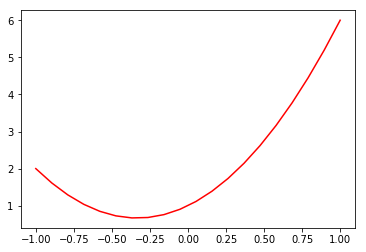

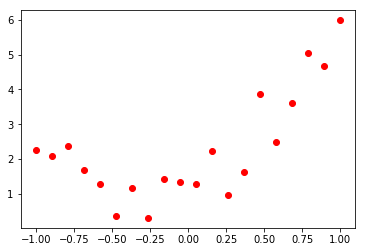

In [82]:
import numpy as np
import pylab as plt
%matplotlib inline

x = np.linspace(-1,1,20)[:,None] # 20 points between -1 and 1

X = np.hstack((
    np.ones_like(x),
    x,
    x**2
))

true_w = np.array([[1, 2, 3]]).T

plt.figure()
plt.plot(x, np.dot(X, true_w),'r-')

# Add noise
sig_sq = 0.5**2
t = np.dot(X,true_w) + np.random.normal(scale=np.sqrt(sig_sq),size = x.shape)

plt.figure()
plt.plot(x,t,'ro')

[[0.]
 [0.]
 [0.]]
[[10.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0. 10.]]


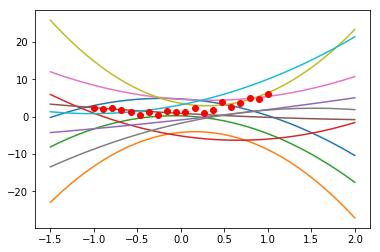

In [90]:
# Define the prior over w
weight_count = len(true_w)
prior_mean = np.zeros((weight_count,1))
prior_cov = 10.0*np.eye(weight_count)
print(prior_mean)
print(prior_cov)

# Generate some samples from the prior and plot
w_samples = np.random.multivariate_normal(prior_mean.flatten(), prior_cov, 10)
#print(w_samples)

# Fine-grained test set
testx = np.linspace(-1.5,2.0,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx,testx**2))

plt.figure()
for w_s in w_samples:
    plt.plot(testx,np.dot(testX,w_s))
plt.plot(x,t,'ro')

[[1.19229943]
 [1.65927423]
 [3.01564236]]
[[ 2.79843304e-02 -5.90082157e-18 -4.21238436e-02]
 [-5.90082157e-18  3.38138459e-02  1.50175688e-17]
 [-4.21238436e-02  1.50175688e-17  1.14479067e-01]]
[1.07740022 1.46782461 2.97115532]
[1.39738119 1.47462709 2.65158504]
[1.29262501 1.82574686 2.93881132]
[1.34134191 1.72641843 2.63524607]
[1.18394548 1.90412226 2.72094499]
[0.91781128 1.557913   3.15574401]
[1.1974332  1.97456938 3.36742406]
[1.08701361 1.53786326 2.98970395]
[1.24397985 1.75159269 2.8634299 ]
[1.16626382 1.59116212 3.28278567]


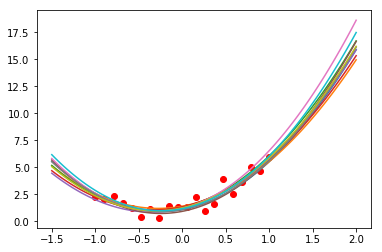

In [104]:
#
# Bayesian inference
#

# Compute the posterior covariance and mean
posterior_cov = np.linalg.inv((1.0/sig_sq)*np.dot(X.T,X) + np.linalg.inv(prior_cov))
posterior_mu = ((1.0/sig_sq))*np.dot(posterior_cov,np.dot(X.T,t))
print(posterior_mu)
print(posterior_cov)

#posterior_predictions = np.dot(X.T, posterior_mu)

# Generate samples from posterior and plot
w_samples = np.random.multivariate_normal(posterior_mu.flatten(),posterior_cov,10)
plt.figure()
plt.plot(x,t,'ro')



for w in w_samples:
    print(w)
    plt.plot(testx,np.dot(testX,w))
    

#
# Cross-validate to find best w
#

[[1.07039448 2.36706319 3.02432538]
 [0.92467644 1.63455008 3.03711234]
 [0.80763432 1.77273472 3.59605611]
 ...
 [0.83376053 2.04323421 2.96298298]
 [1.31878054 1.94217865 2.0875129 ]
 [1.15414931 2.19833814 2.5990216 ]]


(array([  8.,  37.,  95., 167., 207., 215., 141.,  81.,  38.,  11.]),
 array([ 8.15829969,  8.56765026,  8.97700084,  9.38635141,  9.79570199,
        10.20505257, 10.61440314, 11.02375372, 11.4331043 , 11.84245487,
        12.25180545]),
 <a list of 10 Patch objects>)

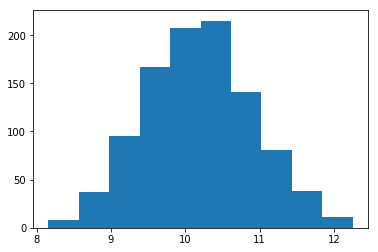

In [52]:
#
# I think this part does not make sense / is not needed for us
#

# Make predictions from sampling
pred_x = np.array([[1, 1.5, 1.5**2]]).T

n_samps = 1000
w_samples = np.random.multivariate_normal(posterior_mu.flatten(), posterior_cov, n_samps)
print(w_samples)

predictions = []
for w_s in w_samples:
    predictions.append(np.dot(w_s.T,pred_x))

plt.figure()
plt.hist(np.array(predictions))

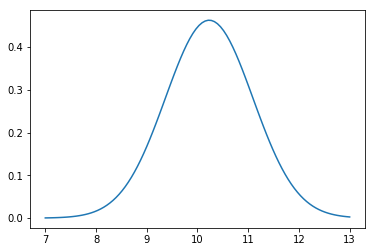

In [51]:
# Compute the exact predictive distribution
pred_mu = np.dot(posterior_mu.T,pred_x)
pred_var = sig_sq + np.dot(pred_x.T,np.dot(posterior_cov,pred_x))

# Plot the pdf to compare with the histogram
plt.figure()
from scipy.stats import norm
t_vals = np.linspace(7,13,100)[:,None]
plt.plot(t_vals,norm.pdf(t_vals,pred_mu,np.sqrt(pred_var)))